In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import * # Should just import go to use that obj
%matplotlib inline
# Jupyter setup
init_notebook_mode(connected=True)

endangered_languages = pd.read_csv(
    './data_sets/endangered_languages_final.csv', index_col=0)

In [10]:
endangered_languages.head()

,Countries Where Spoken,Country Code,Degree of Endangerment,Speakers,Latitude,Longitude,Fertility Rate Avg,2018 Rank,2018 Score,2018 Band,Number of Countries Spoken,GDP Average (Current US $)
Language,,,,,,,,,,,,
South Italian,Italy,ITA,Vulnerable,7500000.0,40.9798,15.2490,1.714074,35.0,55.77,Moderate Proficiency,1,9.443374e+11
Sicilian,Italy,ITA,Vulnerable,5000000.0,37.4399,14.5019,1.714074,35.0,55.77,Moderate Proficiency,1,9.443374e+11
Lombard,"Italy, Switzerland",ITA,Definitely endangered,3500000.0,45.7215,9.3273,1.714074,35.0,55.77,Moderate Proficiency,2,9.443374e+11
Emilian-Romagnol,"Italy, San Marino",ITA,Definitely endangered,2000000.0,44.1270,12.0739,1.714074,35.0,55.77,Moderate Proficiency,2,9.443374e+11
Piedmontese,Italy,ITA,Definitely endangered,2000000.0,45.2013,7.8662,1.714074,35.0,55.77,Moderate Proficiency,1,9.443374e+11


In [11]:
endangered_languages.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2697 entries, South Italian to Scanian
Data columns (total 12 columns):
Countries Where Spoken        2697 non-null object
Country Code                  2697 non-null object
Degree of Endangerment        2697 non-null object
Speakers                      2514 non-null float64
Latitude                      2694 non-null float64
Longitude                     2694 non-null float64
Fertility Rate Avg            2697 non-null float64
2018 Rank                     2097 non-null float64
2018 Score                    2097 non-null float64
2018 Band                     2097 non-null object
Number of Countries Spoken    2697 non-null int64
GDP Average (Current US $)    2697 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 273.9+ KB


# Exploring the Data
First let's get a description of each of the columns of my data set and then, we'll explore the data set by using a manual decision tree to drill down into the data. 
<ul>
<li>Index - Name of the language</li>
<li>Countries where spoken - Comma separated string of all the countries that language is known to be spoken in</li>
<li>Country Code - Alpha 3 country code (used this column to merge many of the disparate datasets)</li>
<li>Degree of Endangerment - Describes the level of danger the langauage is in</li>
<li>Speakers - Number of speakers for each langagues</li>
<li>Latitude - Latitudinal coordinate</li>
<li>Longitude - Longitudinal coordinate</li>
<li>Fertility Rate Avg. - Mean fertility rate for the country in the country code (1960 -2013)</li>
<li>2018 Rank - The rank 1 - 89 of countries that took the EF English Proficiency Exam in 2017</li>
<li>2018 Score - The score 100 - 0 of countries that took the EF English Proficiency Exam in 2017</li>
<li>2018 Band - Level of English proficiency for each country</li>
<li>Number of Countries Spoken - How many countries are/were speaking this language (It's the length of the Countries where Spoken column</li>
<li>GDP Avgerage (Current US $) - Mean GDP data from the world bank (1960 - 2017)</li>
</ul>

### First things first
Even in my cleaned data set there are still some missing values, so I've decided to drop the langauges with no known EF score (since being a country with high access to English is central to my hypothesis, I'm leaving those columns out for EDA purposes. I will be bringing them back for the ML model later on)

In [12]:
endangered_languages = endangered_languages.dropna()
# Now you can see all the missing values are gone
endangered_languages.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1931 entries, South Italian to Island Carib
Data columns (total 12 columns):
Countries Where Spoken        1931 non-null object
Country Code                  1931 non-null object
Degree of Endangerment        1931 non-null object
Speakers                      1931 non-null float64
Latitude                      1931 non-null float64
Longitude                     1931 non-null float64
Fertility Rate Avg            1931 non-null float64
2018 Rank                     1931 non-null float64
2018 Score                    1931 non-null float64
2018 Band                     1931 non-null object
Number of Countries Spoken    1931 non-null int64
GDP Average (Current US $)    1931 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 196.1+ KB


## Endangered Langagues 

I wanted to get a feel for where all the endangered langagues and extinct languages were located. So let's plot them on a globe to see where they are. The size of the bubbles is based on the speakers of that langague, so you'll have to zoom in to see many of the extinct langagues. 

In [13]:
trace1 = {
    'lat': list(endangered_languages['Latitude']),
    'lon': list(endangered_languages['Longitude']),
    'marker': {
        'color': np.random.randn(1931), 
        'colorscale': 'Viridis',
        'size': list(endangered_languages['Speakers']),
        'sizemode': 'area',
        'sizeref': 5000
    },
    'text': list(endangered_languages.index.values),
    'type': 'scattergeo',
    'uid': '6cf3d0'
}

data = Data([trace1])
layout = {
    'autosize': True,
    'geo': {
        'projection': {'type': 'orthographic'},
        'showcountries': True,
        'showlakes': True,
        'showland': True,
        'showocean': True,
        'showrivers': True
    },
    'height': 741,
    'hovermode': 'closest',
    'title': 'Endangered Langagues around the World',
    'width': 900
}

fig = Figure(data=data, layout=layout)
iplot(fig)

From the next two graphs we can see how the languages are distributed grouped by their endangerment levels and level of proficiency in English. It seems logical that the vulnerable and definitely endangered langauges would have more data points, but something of interest is that it seems that the langauages whose countries who now speak English moderately well are more well represented. 

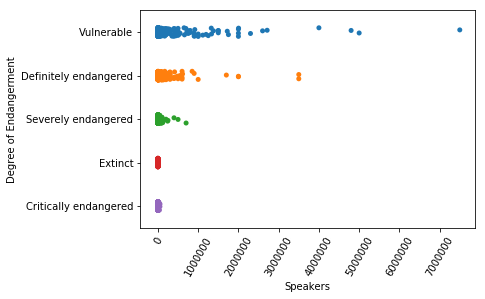

In [14]:
g = sns.stripplot(data=endangered_languages, y="Degree of Endangerment", x="Speakers", jitter=True)
for item in g.get_xticklabels():
    item.set_rotation(60)
# g_fig = g.get_figure()
# g_fig.savefig('./images/stripplot_endangered.png', bbox_inches='tight')

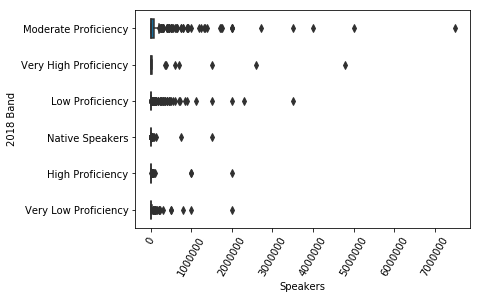

In [15]:
x = sns.boxplot(data=endangered_languages, y="2018 Band", x="Speakers", width=0.5, palette="colorblind")
for item in x.get_xticklabels():
    item.set_rotation(60)

### 1. First split in the decision tree
I want to split the set into countries whose first langauage is English, that list includes the United States, Great Britan, Australia, Canada, New Zealand and Ireland) and coutnries whose native lanagues is something other than English

In [16]:
eng_speakers = endangered_languages[endangered_languages['Country Code'].isin(
    ['GBR', 'USA', 'CAN', 'AUS', 'NZL', 'IRL'])]
non_eng_speakers = endangered_languages[~endangered_languages['Country Code'].isin(
    ['GBR', 'USA', 'CAN', 'AUS', 'NZL', 'IRL'])]

### 2. Next fork in the road
Now let's separate the extinct languages (those with no speakers) from the still living langauges. In my ML model I will be using the extinct languages to test my predictions, but for now I'll separate them to perform different but still pertinent EDA on that set of the data

In [17]:
living_lang_eng = eng_speakers[eng_speakers['Degree of Endangerment'] != 'Extinct']
extinct_eng = eng_speakers[eng_speakers['Degree of Endangerment'] == 'Extinct']
living_lang_non_eng = non_eng_speakers[non_eng_speakers['Degree of Endangerment'] != 'Extinct']
extinct_non_eng = non_eng_speakers[non_eng_speakers['Degree of Endangerment'] == 'Extinct']

### 3. Let's drill down even more!
Now that the dataset is esentially split into 4 groups, I'll leave the extinct languages to the side for now. (We'll come back to them later) I want to look deeper into the living langagues. The level of endangerment for each langague can be one of the following
<ul>
<li>Vulnerable</li>
<li>Defintely Endangered</li>
<li>Severly Endangered</li>
<li>Critically Endangered</li>
</ul>

I'd like to group them by their category and run some analysis on each of those mini data sets to see what information we might gather

In [18]:
level = living_lang_eng.groupby(['Degree of Endangerment'])

vulnerable_eng = level.get_group('Vulnerable')
definitely_eng = level.get_group('Definitely endangered')
severly_eng = level.get_group('Severely endangered')
critically_eng = level.get_group('Critically endangered')

And let's do the same for non_eng langagues

In [19]:
level2 = living_lang_non_eng.groupby(['Degree of Endangerment'])

vulnerable_non = level2.get_group('Vulnerable')
definitely_non = level2.get_group('Definitely endangered')
severly_non = level2.get_group('Severely endangered')
critically_non = level2.get_group('Critically endangered')

## Now for some EDA
Let's take a look at the distribution of a couple of factors. 
<ol>
<li>The number of speakers for each of these categories</li>
<li>Their EF English score (for non-english countries)</li>
<li>The average GDP for the countries</li>
<li>The average fertility rate of the countries</li>
</ol>

### Vulnerable languages from English Speaking Countries

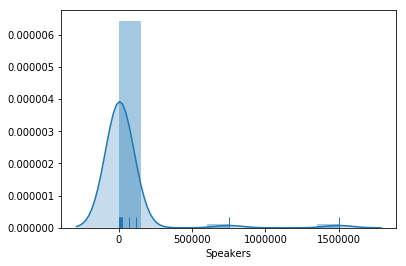

In [20]:
v_eng = sns.distplot(vulnerable_eng['Speakers'], bins=10, kde=True, rug=True, kde_kws={'shade': True})

As we can see, there are some languages with well over 500,000 speakers which prevents us from being able to really get a fell for the distribution of vulnerable langauges. Let's filter that

In [21]:
vulnerable_eng_no_outliers = vulnerable_eng[vulnerable_eng['Speakers'] < 2500]

Taking out some of the outliers such as Welsh and Scottish as they just skew the data and one could argue with that many speakers, the language while vulnerable is nowhere near the danger of the other langagues here

[Text(0.5, 0, 'Avg. GDP in US Trillions $'),
 Text(0.5, 1.0, 'Avg. GDP for Endangered Langauages from Eng. Speaking Countries')]

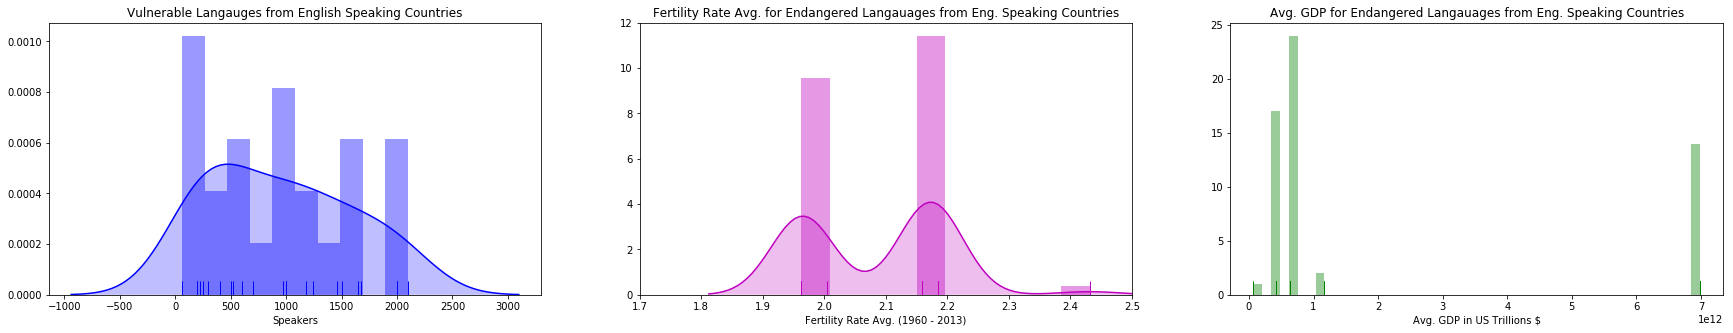

In [22]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1 ,ncols=3, sharey=False, figsize=(30,5))

sns.distplot(vulnerable_eng_no_outliers['Speakers'], bins=10, kde=True, rug=True, kde_kws={'shade': True},
             ax=ax0, color='b')
ax0.set(title='Vulnerable Langauges from English Speaking Countries')

sns.distplot(vulnerable_eng['Fertility Rate Avg'], bins=10, kde=True, rug=True, 
             kde_kws={'shade': True}, ax=ax1, color='m')
ax1.set(xlabel="Fertility Rate Avg. (1960 - 2013)", xlim=(1.7, 2.5), 
        title='Fertility Rate Avg. for Endangered Langauages from Eng. Speaking Countries')

# To change the values from scientific notation into int
int_gdp = vulnerable_eng['GDP Average (Current US $)'].astype(int)
sns.distplot(int_gdp, bins=50, hist=True, kde=False, rug=True, kde_kws={'shade': True}, ax=ax2, color='g')
ax2.set(xlabel="Avg. GDP in US Trillions $", 
        title='Avg. GDP for Endangered Langauages from Eng. Speaking Countries')

# ax1.legend()

The three charts about represent a distribution of data in the vulnerable langauges from English speaking countries data subset. We can tell that the majority of these langagues have under 2500 speakers. The fertility rate is low in these countries which could mean less children to carry on the language and being from countries where English is the native language, children may be encouraged to speak English from an early age (at least in schools to aviod ridicule and shame). The GDP is on average pretty high as well with the US taking in about 7 trillion per year. I will run the same analysis on the other data subsets for English speaking countries. (Definitely, Severly and Critically Endangered) but will leave out the U.S. and their super high average GDP

### Definitely Endangered languages from English Speaking Countries

[Text(0.5, 0, 'Avg. GDP in US Trillions $'),
 Text(0.5, 1.0, 'Avg. GDP for Definitely Endangered Langauages from Eng. Speaking Countries')]

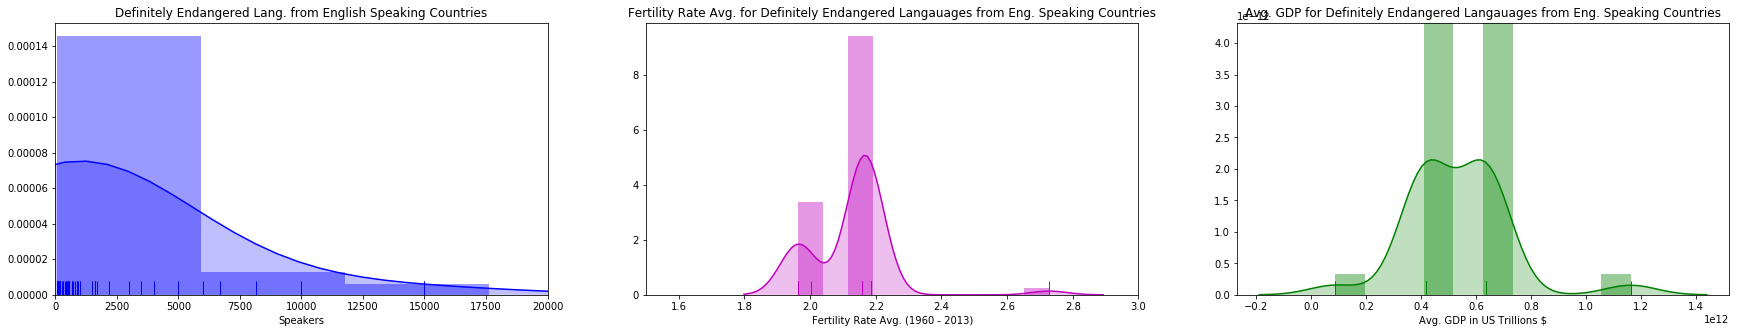

In [23]:
fig, (ax3, ax4, ax5) = plt.subplots(nrows=1 ,ncols=3, sharey=False, figsize=(30,5))

sns.distplot(definitely_eng['Speakers'], bins=10, kde=True, rug=True, kde_kws={'shade': True},
             ax=ax3, color='b')
ax3.set(title='Definitely Endangered Lang. from English Speaking Countries', xlim=(0, 20000))

sns.distplot(definitely_eng['Fertility Rate Avg'], bins=10, kde=True, rug=True, 
             kde_kws={'shade': True}, ax=ax4, color='m')
ax4.set(xlabel="Fertility Rate Avg. (1960 - 2013)", xlim=(1.5, 3), 
        title='Fertility Rate Avg. for Definitely Endangered Langauages from Eng. Speaking Countries')

# To change the values from scientific notation into int
int_gdp2 = definitely_eng['GDP Average (Current US $)'].astype(int)
int_gdp2 = definitely_eng[definitely_eng['Country Code'] != 'USA']['GDP Average (Current US $)'] 
sns.distplot(int_gdp2, bins=10, rug=True, kde_kws={'shade': True}, ax=ax5, color='g')
ax5.set(xlabel="Avg. GDP in US Trillions $", 
        title='Avg. GDP for Definitely Endangered Langauages from Eng. Speaking Countries')

# ax1.legend()

### Severely Endangered languages from English Speaking Countries

[Text(0.5, 0, 'Avg. GDP in US Trillions $'),
 Text(0.5, 1.0, 'Avg. GDP for Severly Endangered Langauages from Eng. Speaking Countries')]

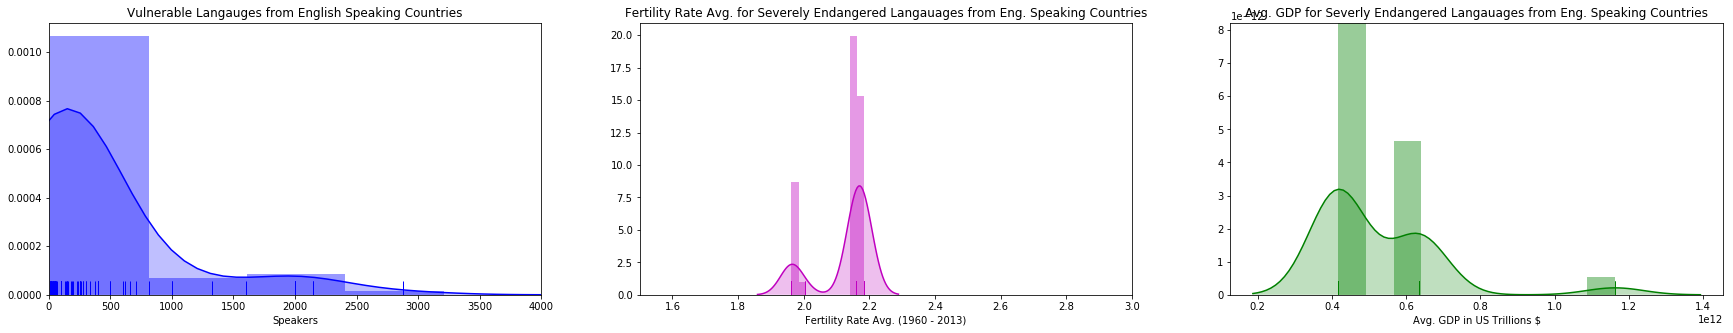

In [24]:
fig, (ax6, ax7, ax8) = plt.subplots(nrows=1 ,ncols=3, sharey=False, figsize=(30,5))

sns.distplot(severly_eng['Speakers'], bins=10, kde=True, rug=True, kde_kws={'shade': True},
             ax=ax6, color='b')
ax6.set(title='Vulnerable Langauges from English Speaking Countries', xlim=(0, 4000))

sns.distplot(severly_eng['Fertility Rate Avg'], bins=10, kde=True, rug=True, 
             kde_kws={'shade': True}, ax=ax7, color='m')
ax7.set(xlabel="Fertility Rate Avg. (1960 - 2013)", xlim=(1.5, 3), 
        title='Fertility Rate Avg. for Severely Endangered Langauages from Eng. Speaking Countries')

# To change the values from scientific notation into int
int_gdp3 = severly_eng['GDP Average (Current US $)'].astype(int)
int_gdp3 = severly_eng[severly_eng['Country Code'] != 'USA']['GDP Average (Current US $)'] 
sns.distplot(int_gdp3, bins=10, rug=True, kde_kws={'shade': True}, ax=ax8, color='g')
ax8.set(xlabel="Avg. GDP in US Trillions $", 
        title='Avg. GDP for Severly Endangered Langauages from Eng. Speaking Countries')

# ax1.legend()

### Critically Endangered Langauges from English Speaking Countries

[Text(0.5, 0, 'Avg. GDP in US Trillions $'),
 Text(0.5, 1.0, 'Avg. GDP for Critically Endangered Langauages from Eng. Speaking Countries')]

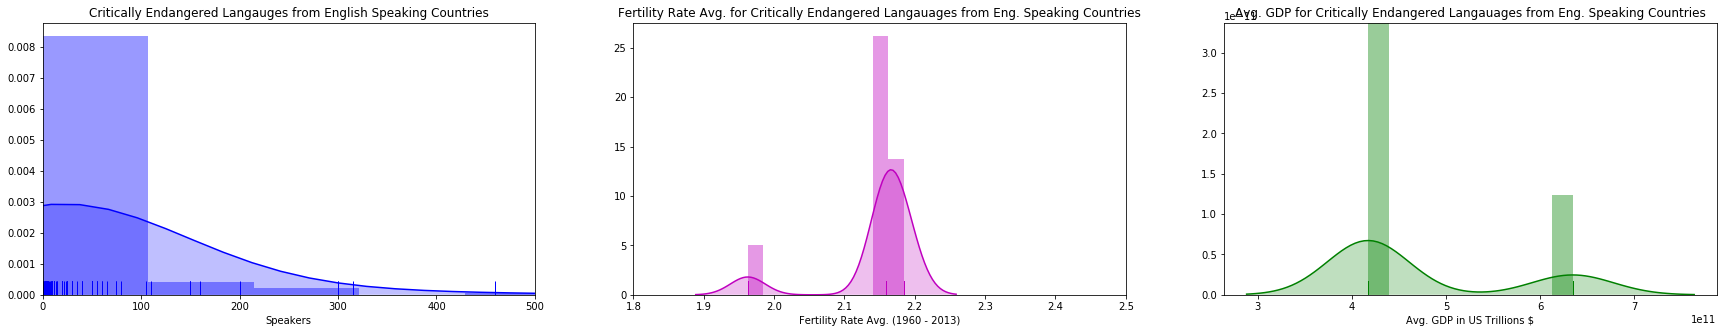

In [25]:
fig, (ax9, ax10, ax11) = plt.subplots(nrows=1 ,ncols=3, sharey=False, figsize=(30,5))

sns.distplot(critically_eng['Speakers'], bins=20, kde=True, rug=True, kde_kws={'shade': True},
             ax=ax9, color='b')
ax9.set(title='Critically Endangered Langauges from English Speaking Countries', xlim=(0, 500))

sns.distplot(critically_eng['Fertility Rate Avg'], bins=10, kde=True, rug=True, 
             kde_kws={'shade': True}, ax=ax10, color='m')
ax10.set(xlabel="Fertility Rate Avg. (1960 - 2013)", xlim=(1.8, 2.5), 
        title='Fertility Rate Avg. for Critically Endangered Langauages from Eng. Speaking Countries')

# To change the values from scientific notation into int
int_gdp4 = critically_eng['GDP Average (Current US $)'].astype(int)
int_gdp4 = critically_eng[critically_eng['Country Code'] != 'USA']['GDP Average (Current US $)'] 
sns.distplot(int_gdp4, bins=10, rug=True, kde_kws={'shade': True}, ax=ax11, color='g')
ax11.set(xlabel="Avg. GDP in US Trillions $", 
        title='Avg. GDP for Critically Endangered Langauages from Eng. Speaking Countries')

# ax1.legend()

### What could these insights mean?
At least from early EDA, looks like between the English speaking countries, the more endangered the language the less the speakers. The same can be looked at for non English speaking countries, which we look at in a few. Let's look to see if there's any correlation between speakers/fertility rate and speakers/GDP for these countries

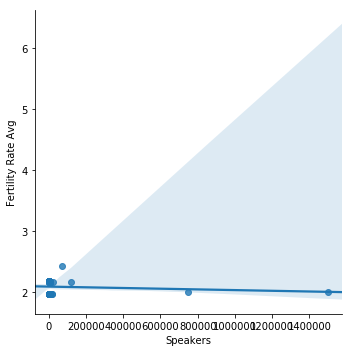

In [26]:
sns.lmplot(x='Speakers', y='Fertility Rate Avg', data=vulnerable_eng, sharex=False, sharey=False)

### Vulnerable languages from Non English Speaking Countries

Let's run some similar EDA on vulnerable langagues from non English speaking countries

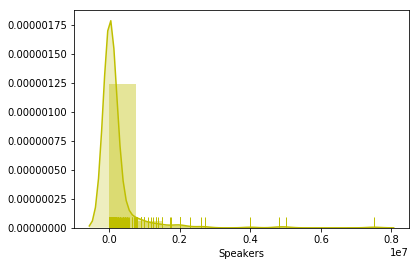

In [27]:
v_non = sns.distplot(vulnerable_non['Speakers'], bins=10, kde=True, rug=True, kde_kws={'shade': True}, color='y')

Again let's restrict the outliers in the number of speakers to really get a picture of the vulnerable langagues

[Text(0.5, 0, '2018 EF English Proficiency Scores'),
 Text(0.5, 1.0, 'Vulnerable lanagues from non Eng. speaking countries EF English scores')]

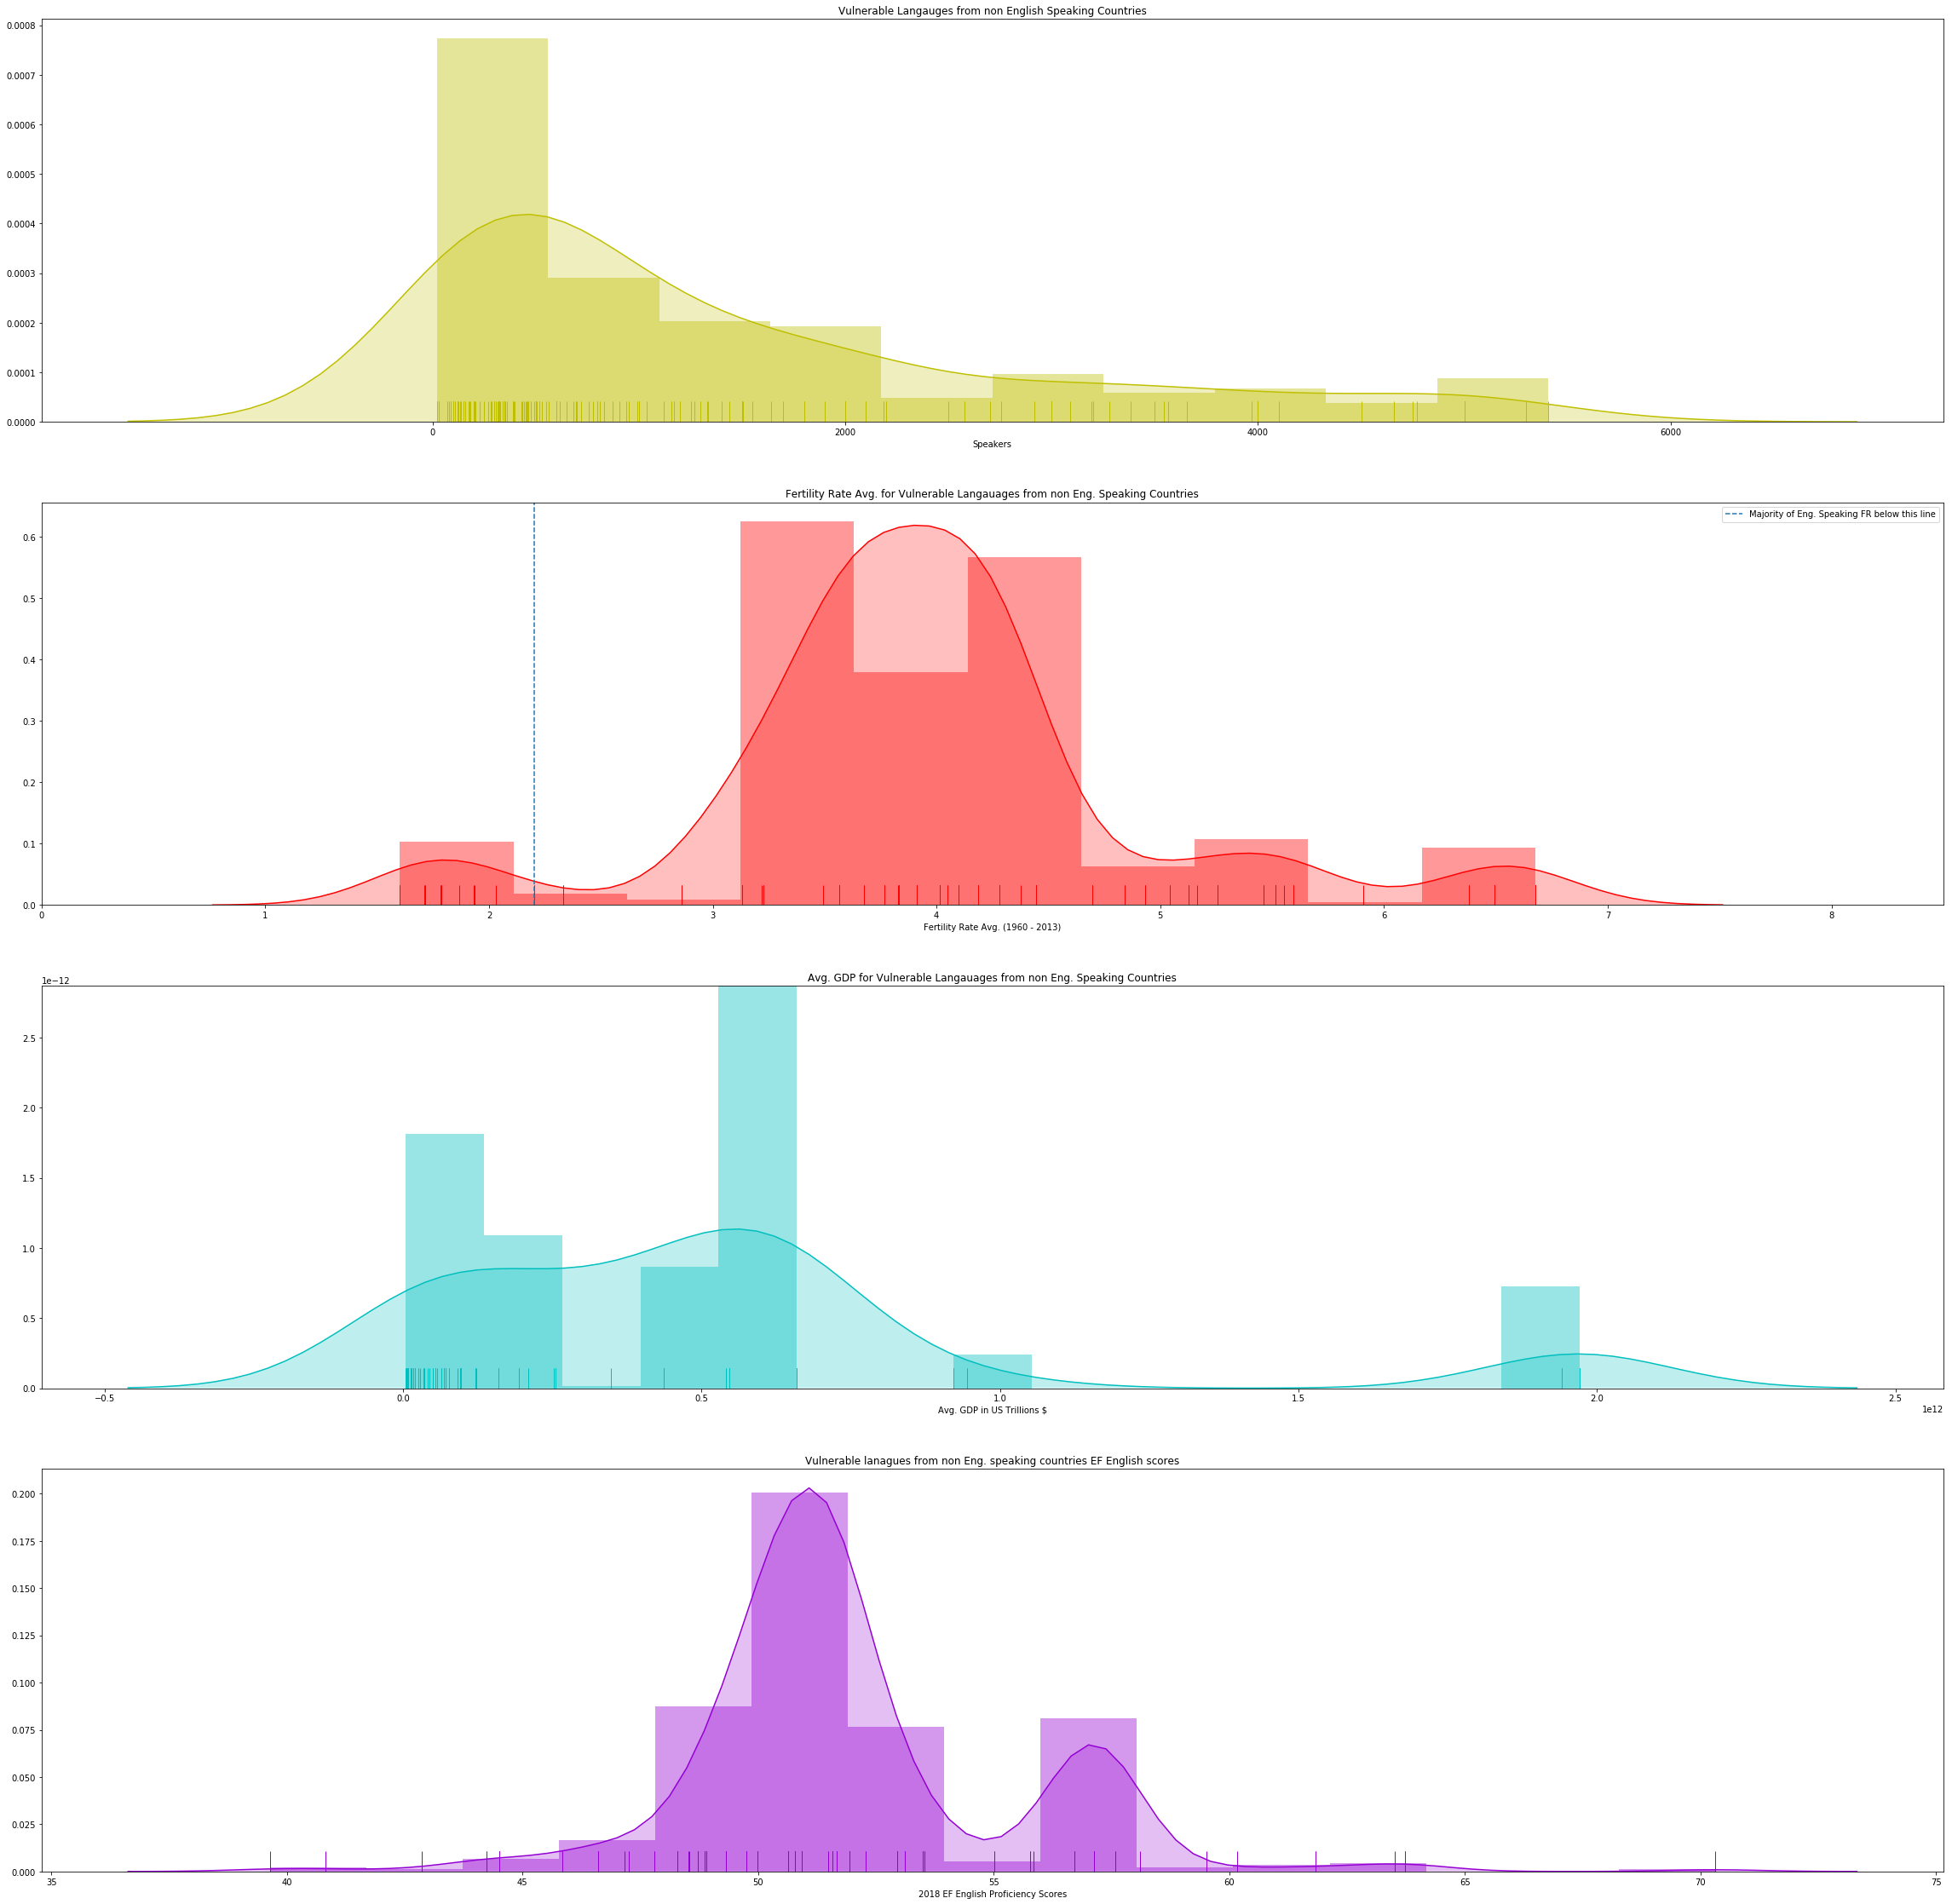

In [28]:
fig, (ax12, ax13, ax14, ax15) = plt.subplots(nrows=4 ,ncols=1, sharey=False, figsize=(40,40))

vulnerable_non_no_outliers = vulnerable_non[vulnerable_non['Speakers'] < 5500]
sns.distplot(vulnerable_non_no_outliers['Speakers'], bins=10, kde=True, rug=True, kde_kws={'shade': True},
             ax=ax12, color='y')
ax12.set(title='Vulnerable Langauges from non English Speaking Countries')

sns.distplot(vulnerable_non['Fertility Rate Avg'], bins=10, kde=True, rug=True, 
             kde_kws={'shade': True}, ax=ax13, color='r')
ax13.set(xlabel="Fertility Rate Avg. (1960 - 2013)", xlim=(0, 8.5), 
        title='Fertility Rate Avg. for Vulnerable Langauages from non Eng. Speaking Countries')
ax13.axvline(x=2.2, label='Majority of Eng. Speaking FR below this line', linestyle='--')
ax13.legend()

# To change the values from scientific notation into int
int_gdp5 = vulnerable_non['GDP Average (Current US $)'].astype(int)
sns.distplot(int_gdp5, bins=15, rug=True, kde_kws={'shade': True}, ax=ax14, color='c')
ax14.set(xlabel="Avg. GDP in US Trillions $", 
        title='Avg. GDP for Vulnerable Langauages from non Eng. Speaking Countries')

sns.distplot(vulnerable_non['2018 Score'], bins=15, kde=True, rug=True, kde_kws={'shade': True}, 
             ax=ax15, color='#9400D3')
ax15.set(xlabel='2018 EF English Proficiency Scores', 
         title='Vulnerable lanagues from non Eng. speaking countries EF English scores')

### Definitely Endangered Languages from non English Speaking Countries

[Text(0.5, 0, '2018 EF English Proficiency Scores'),
 Text(0.5, 1.0, 'Definitely Endangered lanagues from non Eng. speaking countries EF English scores')]

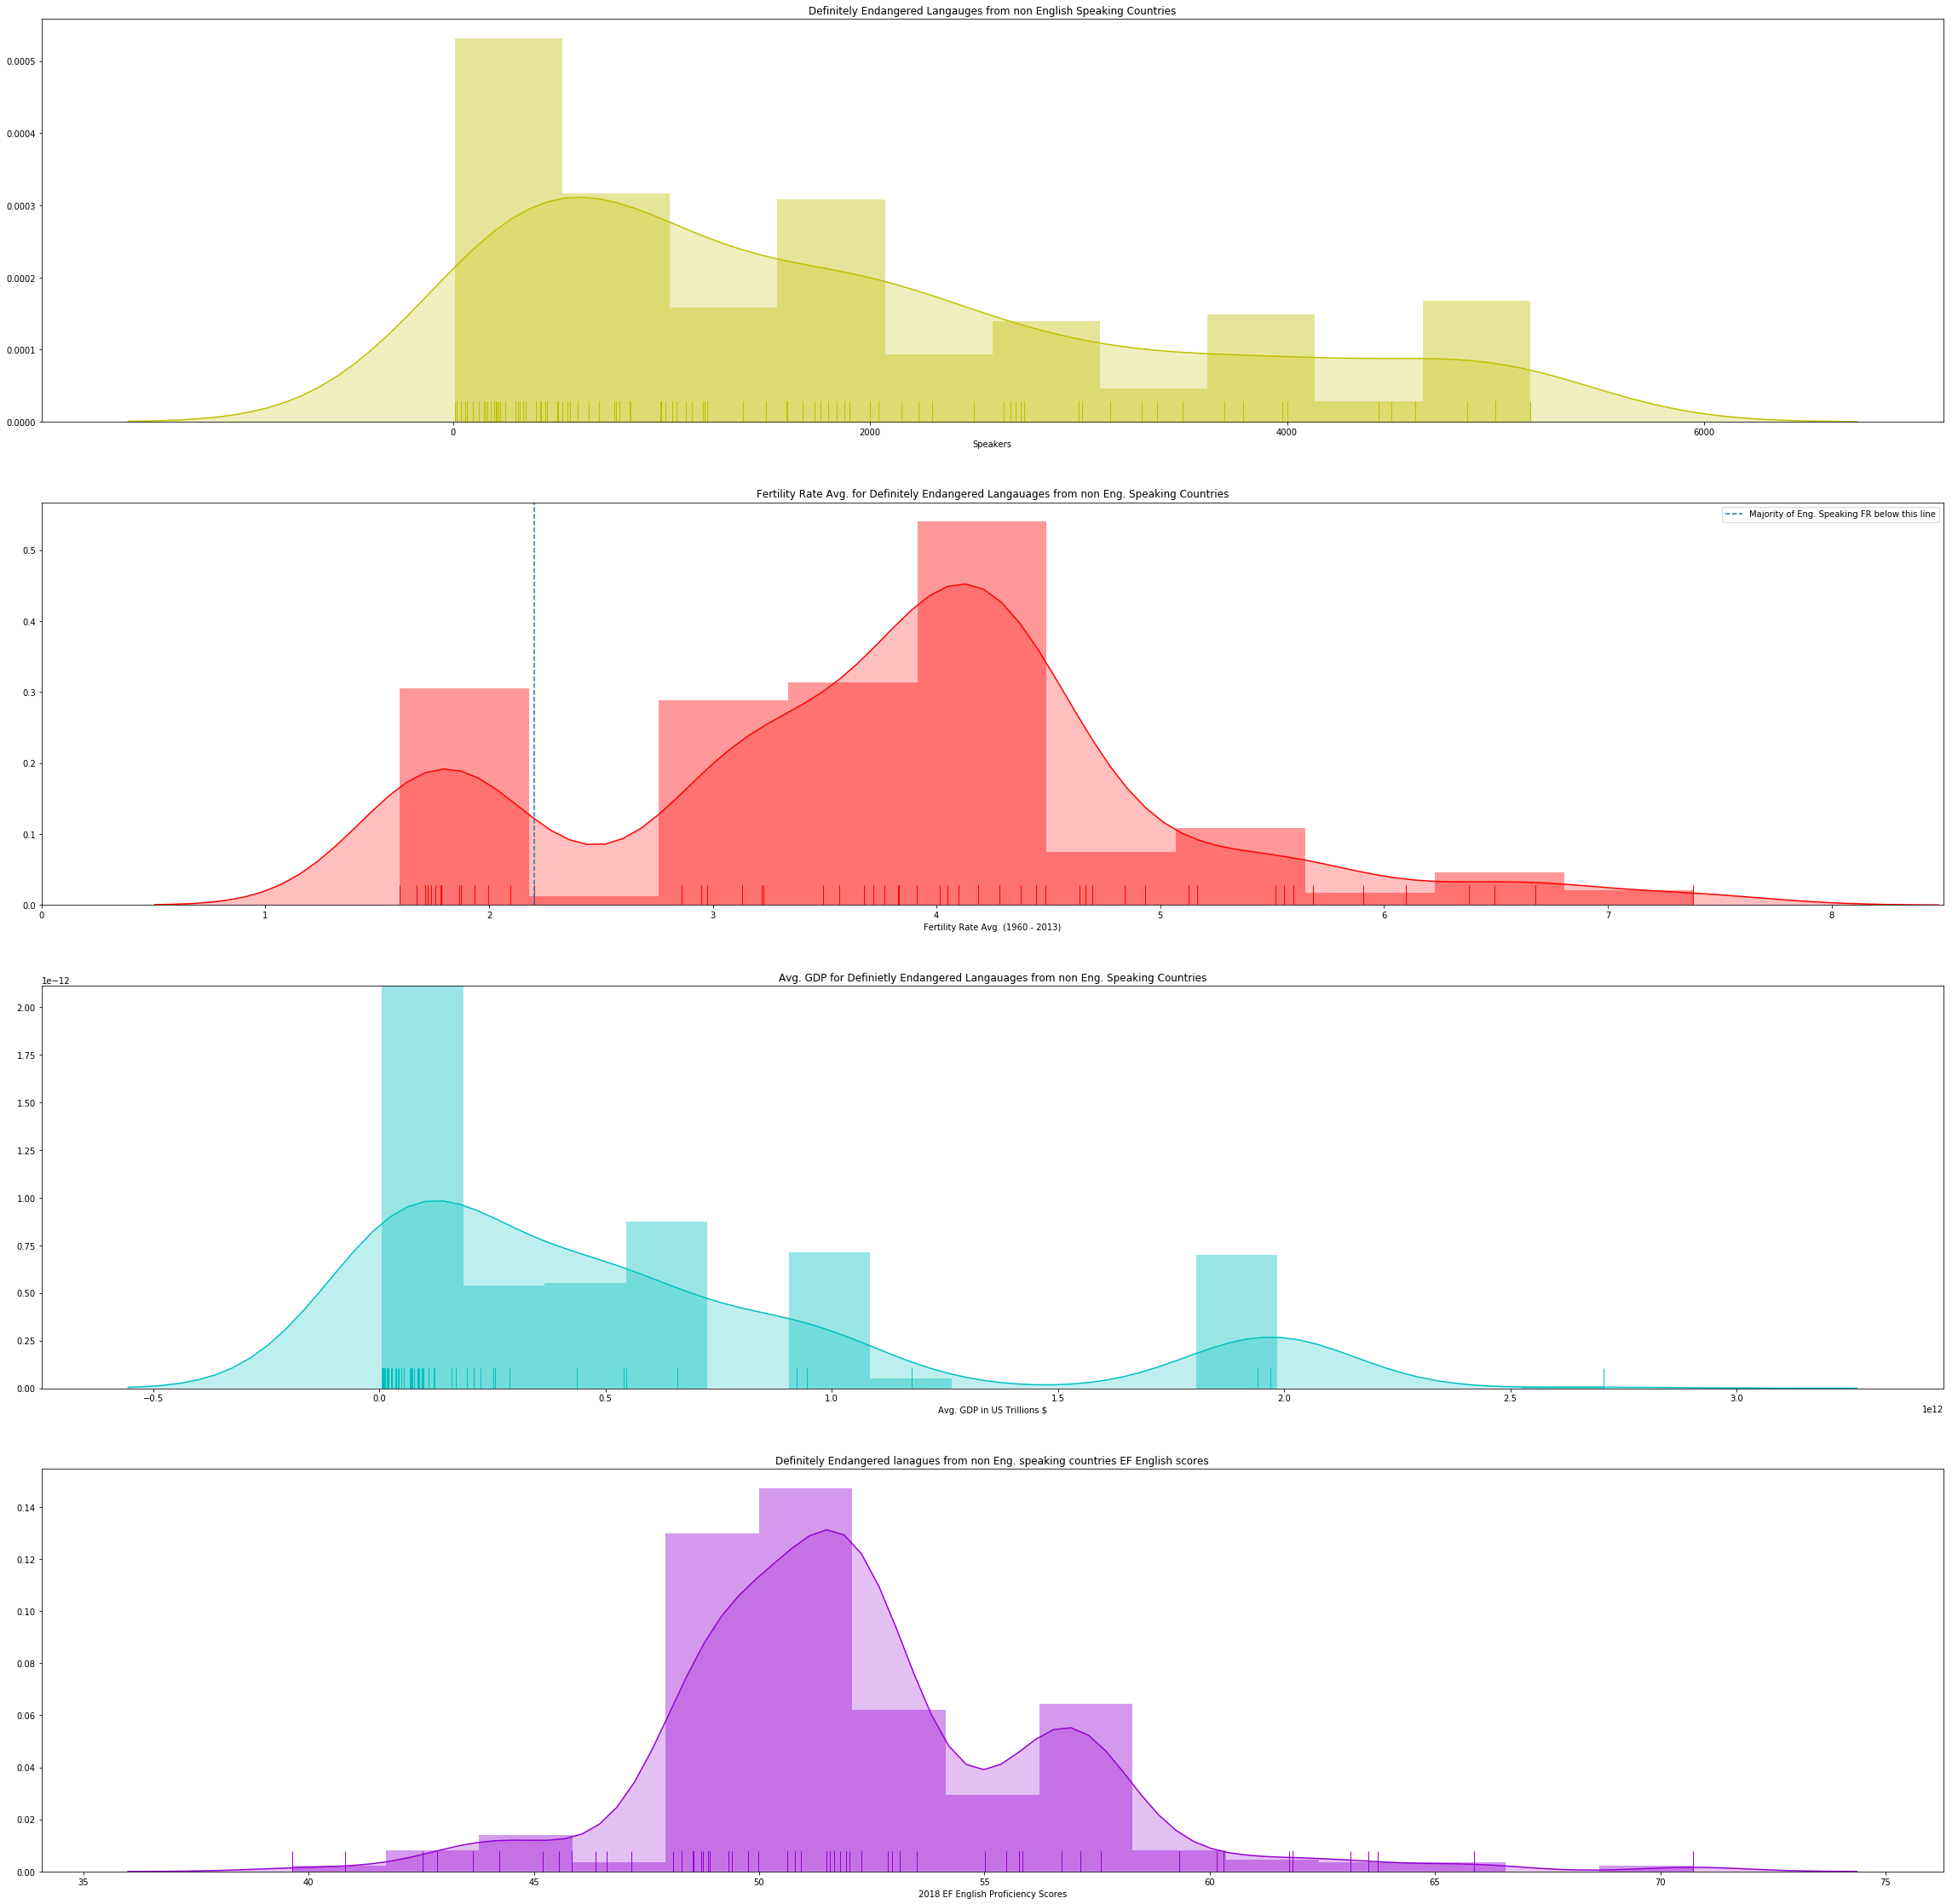

In [29]:
fig, (ax16, ax17, ax18, ax19) = plt.subplots(nrows=4 ,ncols=1, sharey=False, figsize=(40,40))

def_non_no_outliers = definitely_non[definitely_non['Speakers'] < 5500]
sns.distplot(def_non_no_outliers['Speakers'], bins=10, kde=True, rug=True, kde_kws={'shade': True},
             ax=ax16, color='y')
ax16.set(title='Definitely Endangered Langauges from non English Speaking Countries')

sns.distplot(definitely_non['Fertility Rate Avg'], bins=10, kde=True, rug=True, 
             kde_kws={'shade': True}, ax=ax17, color='r')
ax17.set(xlabel="Fertility Rate Avg. (1960 - 2013)", xlim=(0, 8.5), 
        title='Fertility Rate Avg. for Definitely Endangered Langauages from non Eng. Speaking Countries')
ax17.axvline(x=2.2, label='Majority of Eng. Speaking FR below this line', linestyle='--')
ax17.legend()

# To change the values from scientific notation into int
int_gdp6 = definitely_non['GDP Average (Current US $)'].astype(int)
sns.distplot(int_gdp6, bins=15, rug=True, kde_kws={'shade': True}, ax=ax18, color='c')
ax18.set(xlabel="Avg. GDP in US Trillions $", 
        title='Avg. GDP for Definietly Endangered Langauages from non Eng. Speaking Countries')

sns.distplot(definitely_non['2018 Score'], bins=15, kde=True, rug=True, kde_kws={'shade': True}, 
             ax=ax19, color='#9400D3')
ax19.set(xlabel='2018 EF English Proficiency Scores', 
         title='Definitely Endangered lanagues from non Eng. speaking countries EF English scores')

### Severly Endangered Lanaguages from non English Speaking Countries

[Text(0.5, 0, '2018 EF English Proficiency Scores'),
 Text(0.5, 1.0, 'Severly Endangered lanagues from non Eng. speaking countries EF English scores')]

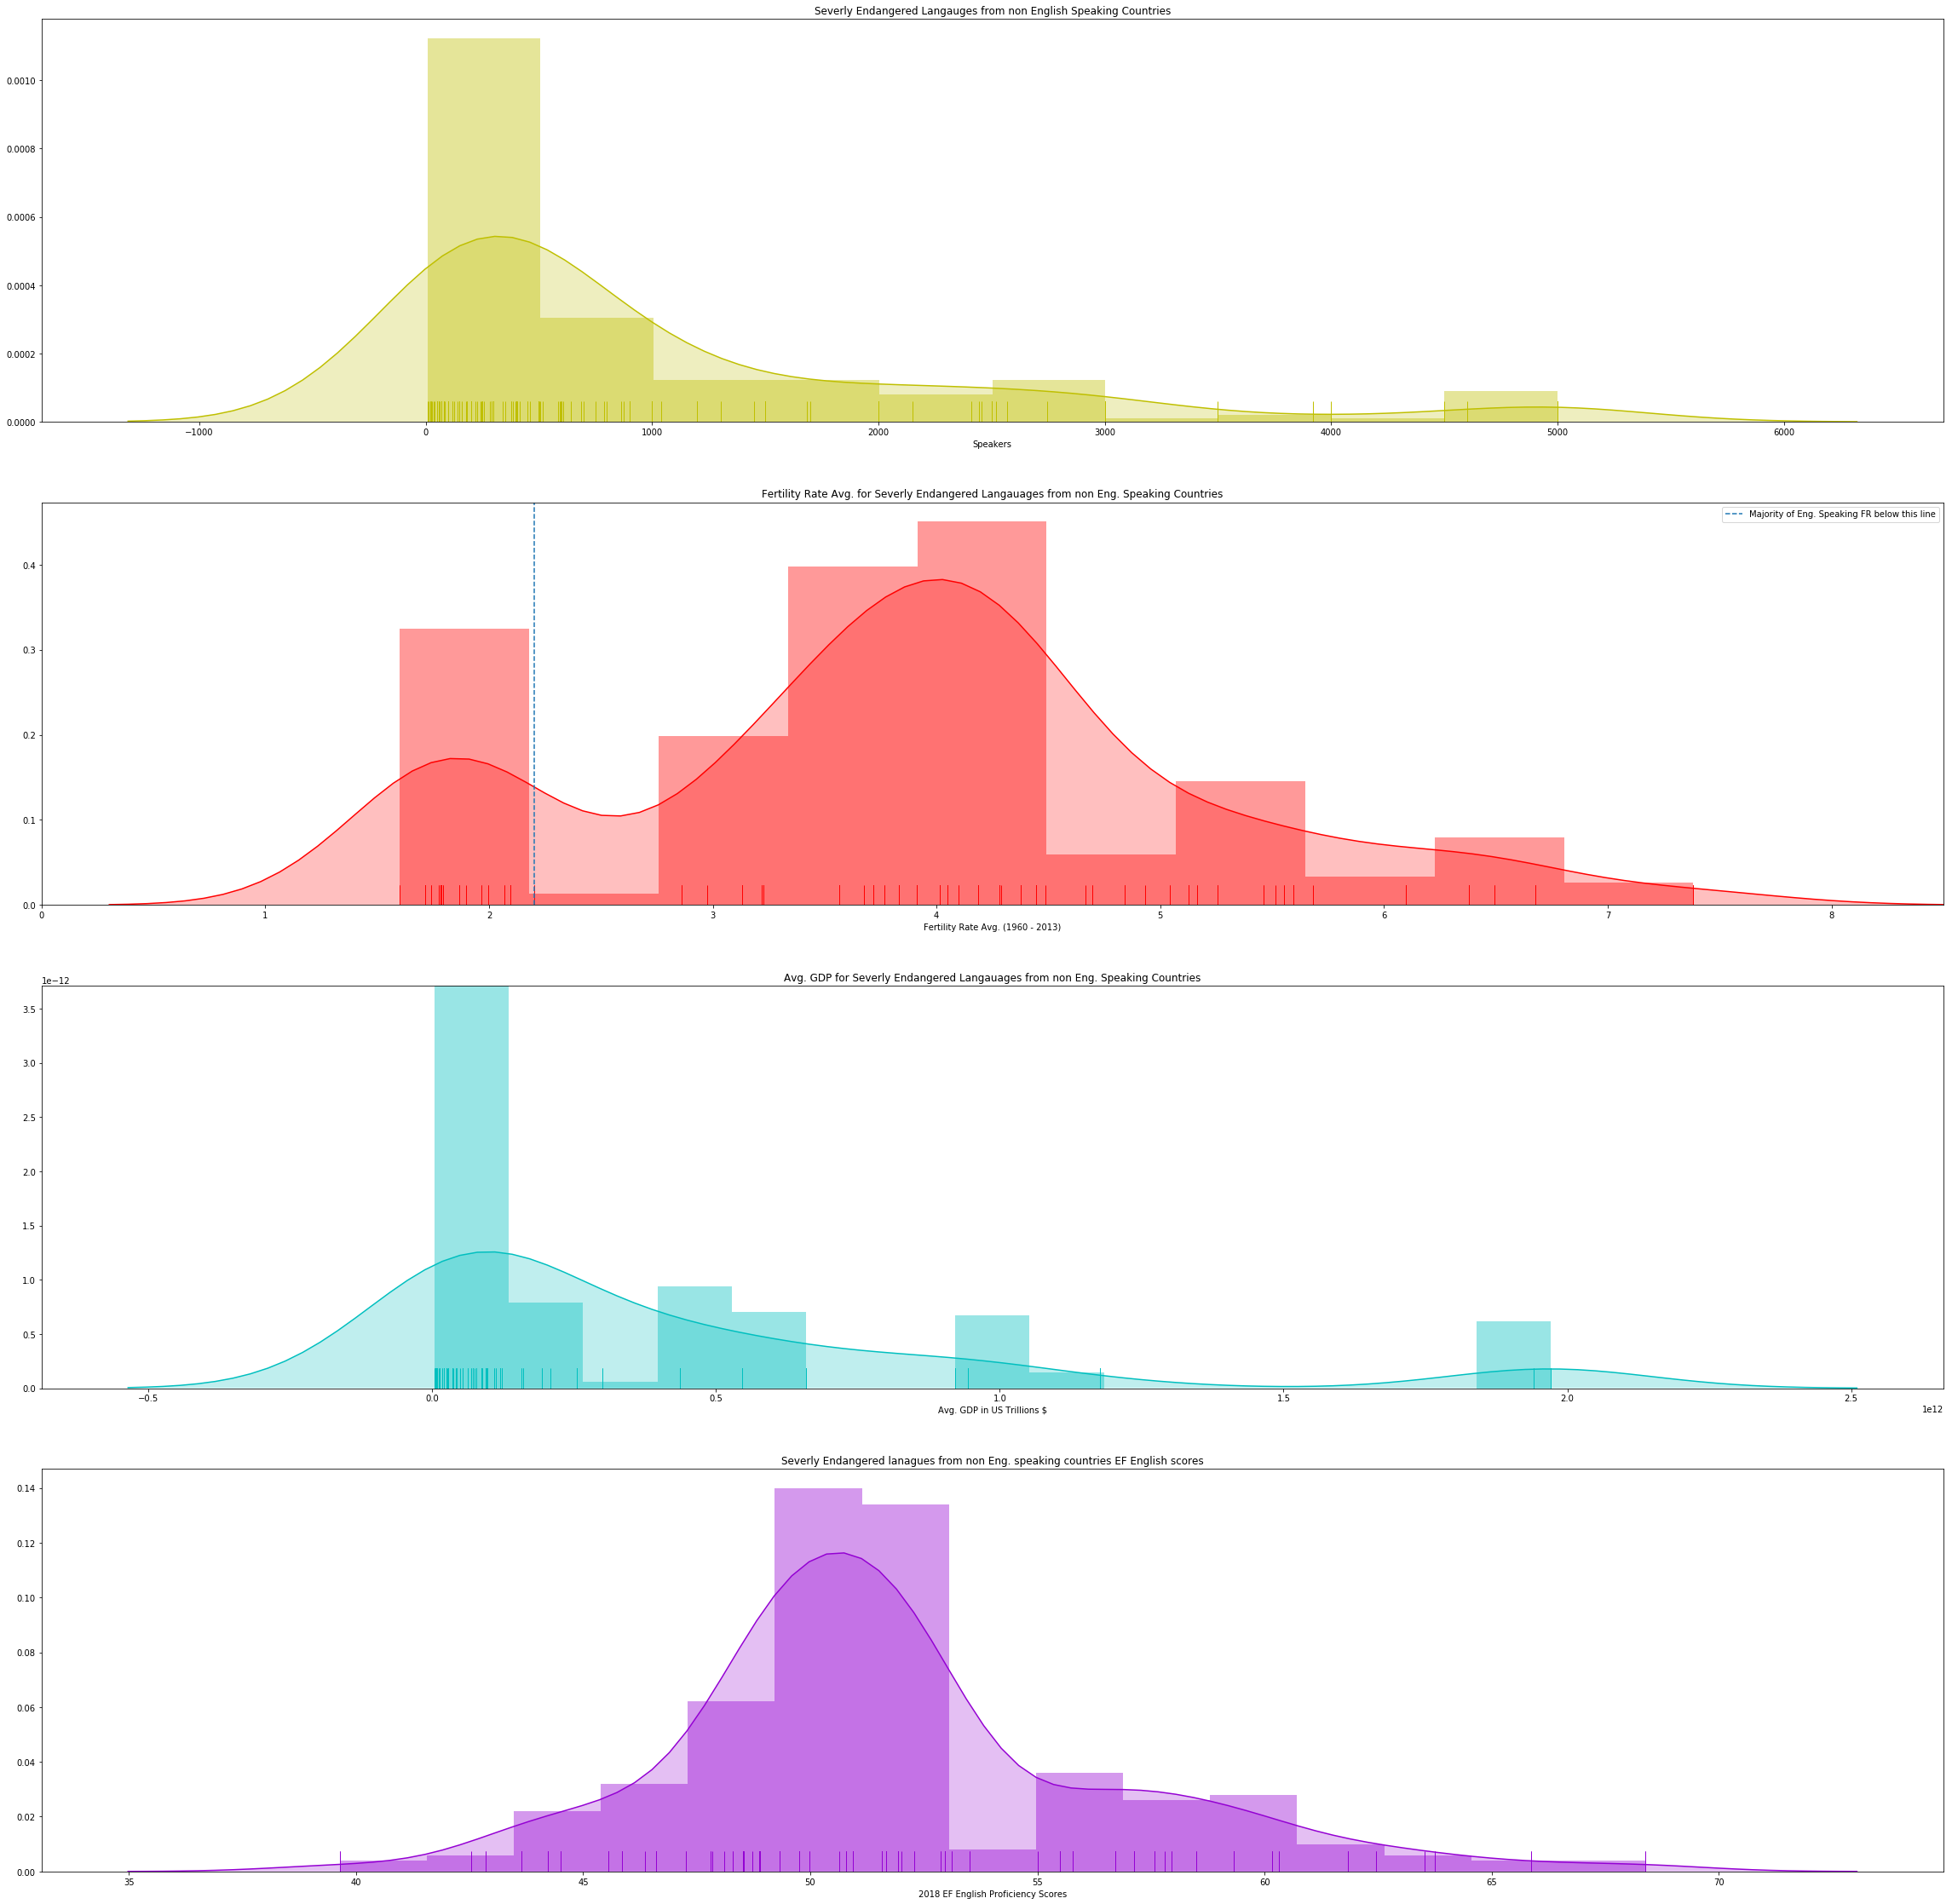

In [30]:
fig, (ax20, ax21, ax22, ax23) = plt.subplots(nrows=4 ,ncols=1, sharey=False, figsize=(40,40))

sev_non_no_outliers = severly_non[severly_non['Speakers'] < 5500]
sns.distplot(sev_non_no_outliers['Speakers'], bins=10, kde=True, rug=True, kde_kws={'shade': True},
             ax=ax20, color='y')
ax20.set(title='Severly Endangered Langauges from non English Speaking Countries')

sns.distplot(severly_non['Fertility Rate Avg'], bins=10, kde=True, rug=True, 
             kde_kws={'shade': True}, ax=ax21, color='r')
ax21.set(xlabel="Fertility Rate Avg. (1960 - 2013)", xlim=(0, 8.5), 
        title='Fertility Rate Avg. for Severly Endangered Langauages from non Eng. Speaking Countries')
ax21.axvline(x=2.2, label='Majority of Eng. Speaking FR below this line', linestyle='--')
ax21.legend()

# To change the values from scientific notation into int
int_gdp7 = severly_non['GDP Average (Current US $)'].astype(int)
sns.distplot(int_gdp7, bins=15, rug=True, kde_kws={'shade': True}, ax=ax22, color='c')
ax22.set(xlabel="Avg. GDP in US Trillions $", 
        title='Avg. GDP for Severly Endangered Langauages from non Eng. Speaking Countries')

sns.distplot(severly_non['2018 Score'], bins=15, kde=True, rug=True, kde_kws={'shade': True}, 
             ax=ax23, color='#9400D3')
ax23.set(xlabel='2018 EF English Proficiency Scores', 
         title='Severly Endangered lanagues from non Eng. speaking countries EF English scores')

### Critically Endangered Lanagaues from non English Speaking Countries

[Text(0.5, 0, '2018 EF English Proficiency Scores'),
 Text(0.5, 1.0, 'Critically Endangered lanagues from non Eng. speaking countries EF English scores')]

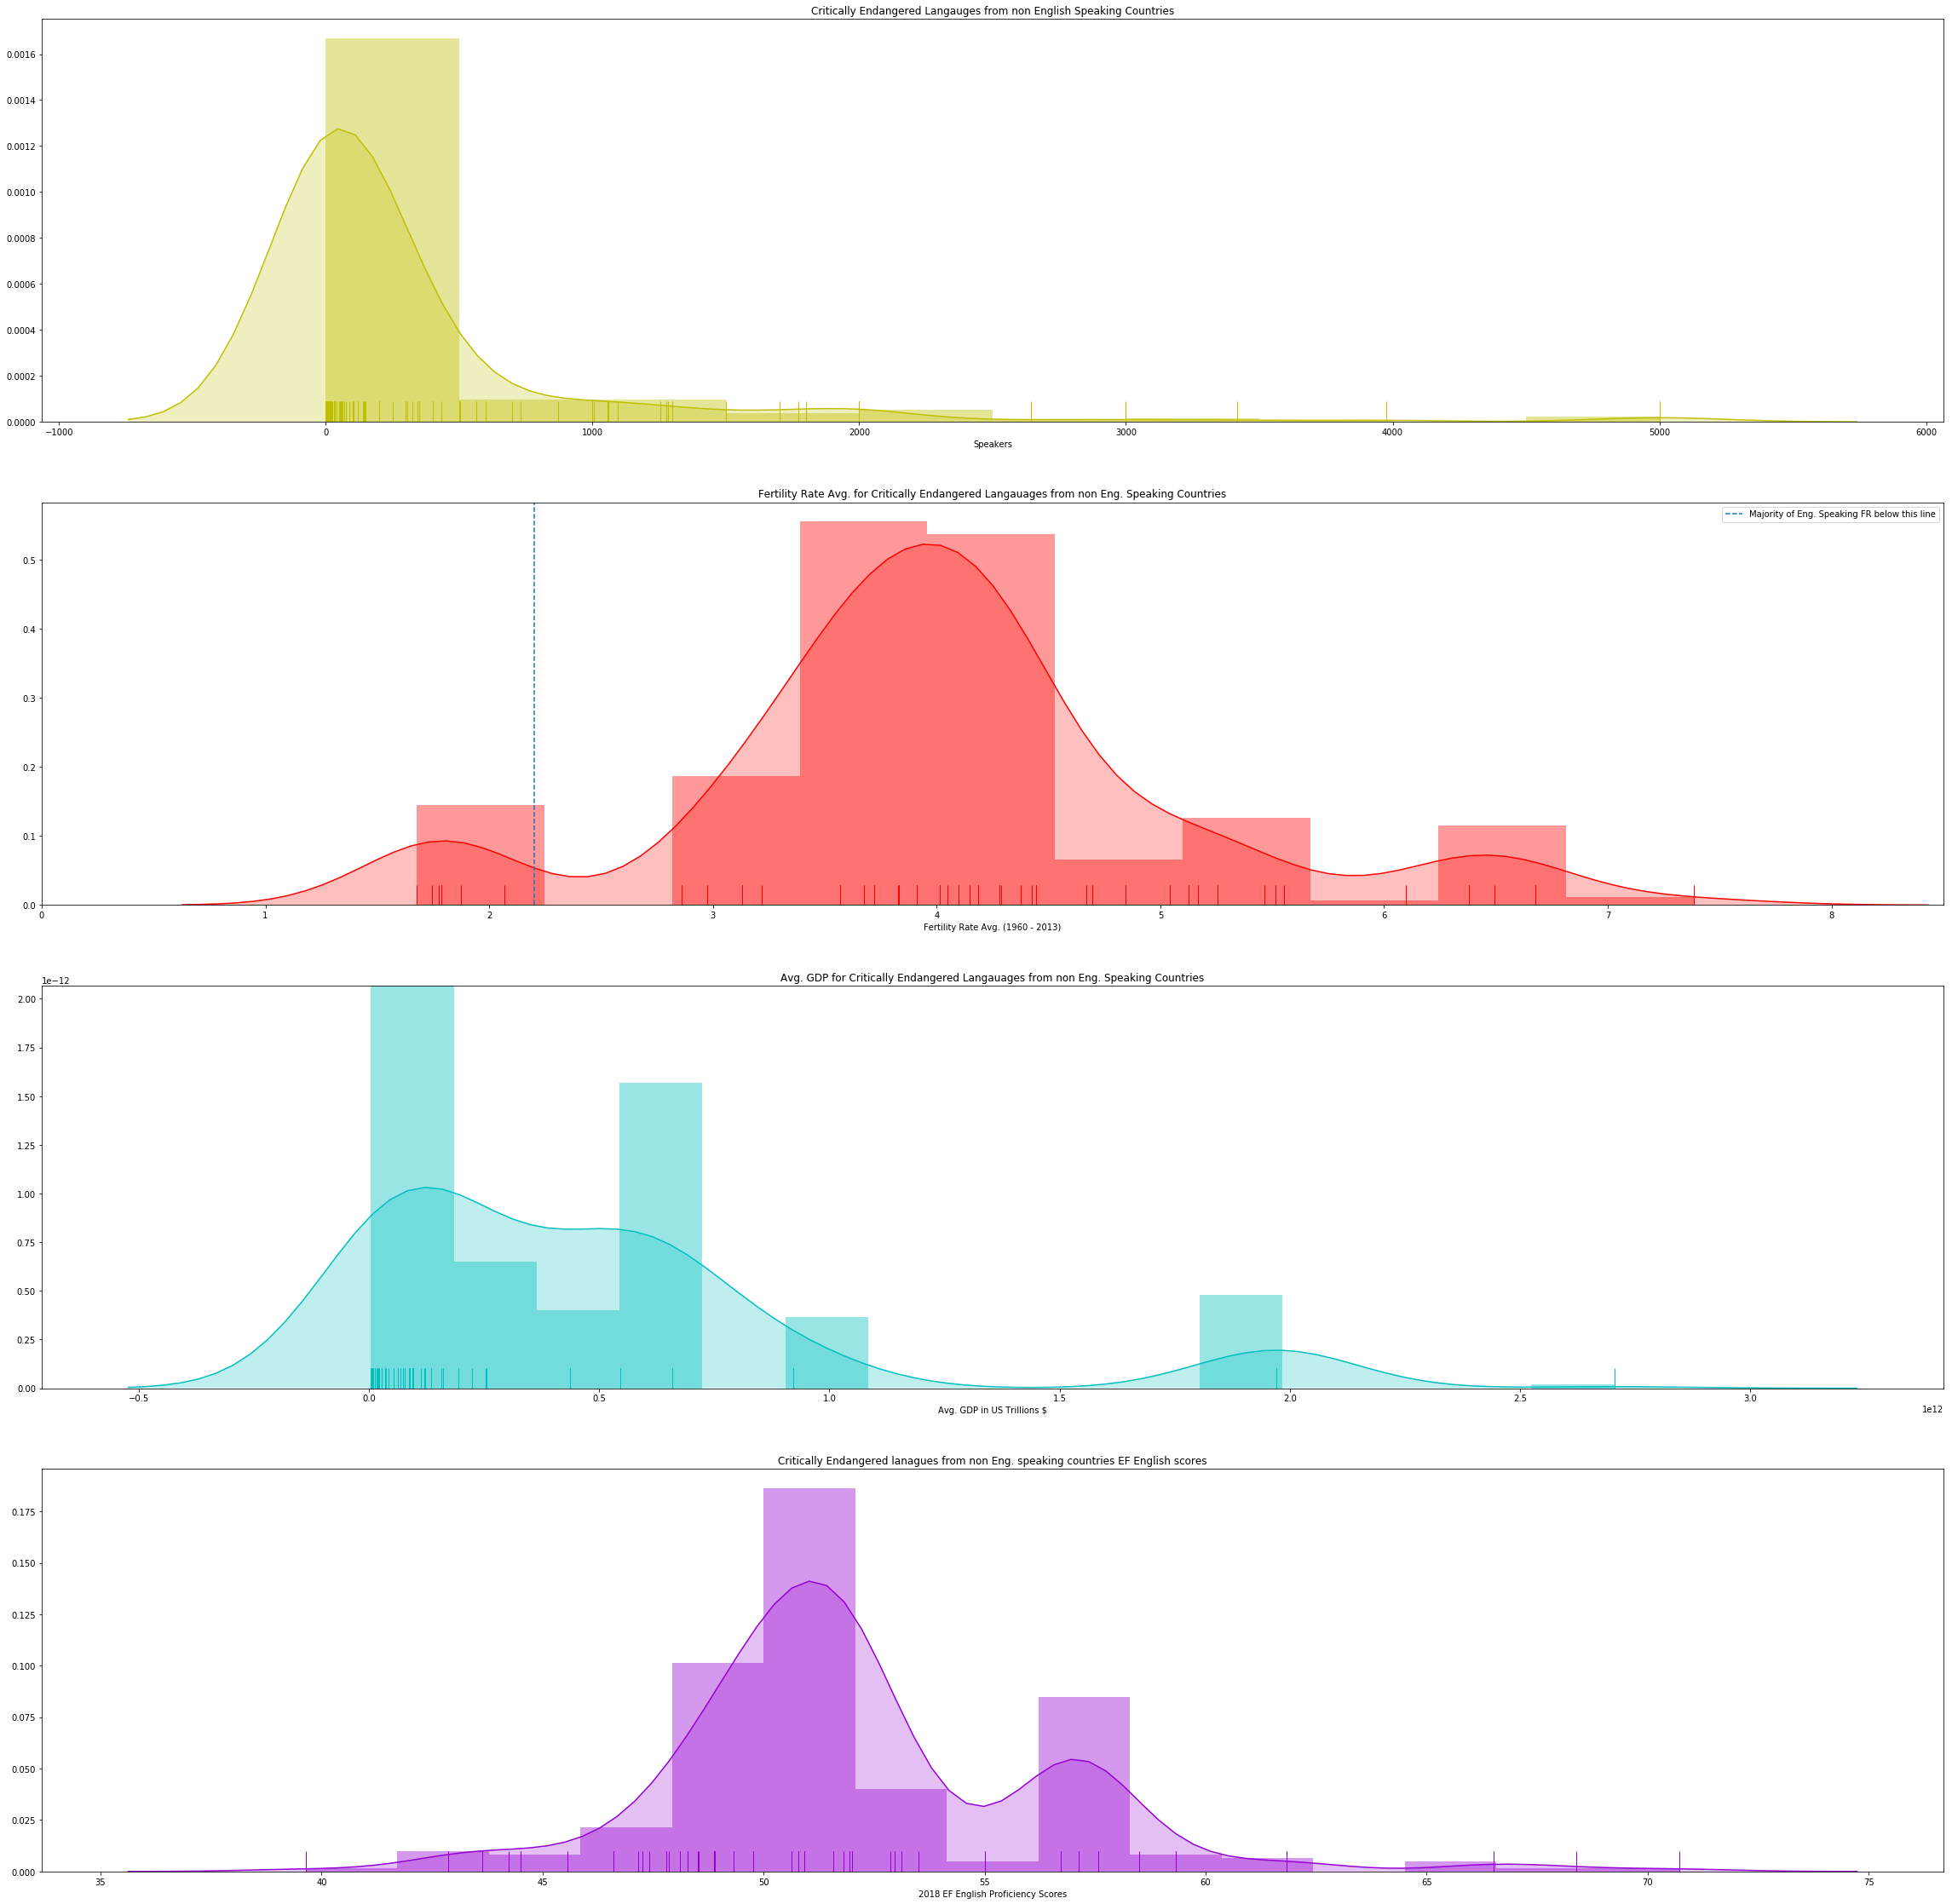

In [31]:
fig, (ax24, ax25, ax26, ax27) = plt.subplots(nrows=4 ,ncols=1, sharey=False, figsize=(40,40))

crit_non_no_outliers = critically_non[critically_non['Speakers'] < 5500]
sns.distplot(crit_non_no_outliers['Speakers'], bins=10, kde=True, rug=True, kde_kws={'shade': True},
             ax=ax24, color='y')
ax24.set(title='Critically Endangered Langauges from non English Speaking Countries')

sns.distplot(critically_non['Fertility Rate Avg'], bins=10, kde=True, rug=True, 
             kde_kws={'shade': True}, ax=ax25, color='r')
ax25.set(xlabel="Fertility Rate Avg. (1960 - 2013)", xlim=(0, 8.5), 
        title='Fertility Rate Avg. for Critically Endangered Langauages from non Eng. Speaking Countries')
ax25.axvline(x=2.2, label='Majority of Eng. Speaking FR below this line', linestyle='--')
ax25.legend()

# To change the values from scientific notation into int
int_gdp8 = critically_non['GDP Average (Current US $)'].astype(int)
sns.distplot(int_gdp8, bins=15, rug=True, kde_kws={'shade': True}, ax=ax26, color='c')
ax26.set(xlabel="Avg. GDP in US Trillions $", 
        title='Avg. GDP for Critically Endangered Langauages from non Eng. Speaking Countries')

sns.distplot(critically_non['2018 Score'], bins=15, kde=True, rug=True, kde_kws={'shade': True}, 
             ax=ax27, color='#9400D3')
ax27.set(xlabel='2018 EF English Proficiency Scores', 
         title='Critically Endangered lanagues from non Eng. speaking countries EF English scores')

I want to take a look at the realationship of the number of speakers of any given lanagaue to their EF English scores. Looking at the vulnerable lanaguages from non English speaking countries data subset, let's see how the data is arranged along a residual line

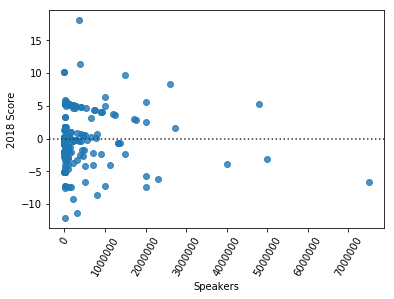

In [32]:
# the data should be represented randonly across the residual line, if there is some curve or shape that may suggest a
# non linear model would be a good choice to analyze it
w = sns.residplot(data=vulnerable_non, x='Speakers', y='2018 Score')
for item in w.get_xticklabels():
    item.set_rotation(60)

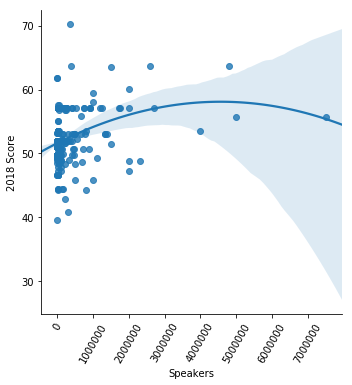

In [51]:
# Looks pretty random but a lot of it stacking up below the residual line. Let's try a second order polynomial function
polynomial = sns.lmplot(x='Speakers', y='2018 Score', data=vulnerable_non, order=2)
for ax in polynomial.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(60)
polynomial.savefig('./images/polynomial_endangered.png', bbox_inches='tight')

This may suggest that a basic mastery of English is required to help a language gain influence and speakers, however after that language has been established, it may be negatively correlated with English scores

## How about those languages that have gone extinct?
Let's see if we can find any trends there. I wonder what's the average fertility rate of these langagues

In [34]:
fr_eng_x = extinct_eng['Fertility Rate Avg'].mean()

fr_non_x = extinct_non_eng['Fertility Rate Avg'].mean()
print('The average Fertility Rate for extinct langagues from non English speaking countries is {0}, while the rate is {1} for English speaking countries'.format(fr_non_x, fr_eng_x) )

The average Fertility Rate for extinct langagues from non English speaking countries is 3.561011247456248, while the rate is 2.1590197431302274 for English speaking countries


#### What about GDP?

In [35]:
from utils.human_readable_numbers import millify
gdp_eng_x = extinct_eng['GDP Average (Current US $)'].astype(int).mean()
gdp_non_x = extinct_non_eng['GDP Average (Current US $)'].astype(int).mean()

print('The avg GDP for extinct languages from non English speaking countires is {}'.format(millify(gdp_non_x)))
print('The avg GDP for extinct languages from English speaking countires is {}'.format(millify(gdp_eng_x)))

The avg GDP for extinct languages from non English speaking countires is 492 Billion
The avg GDP for extinct languages from English speaking countires is 6 Trillion


#### And just how far is the langague spead?
Meaning, how many countries is this language spoken in? Is it located in just one country or many around the globe

In [36]:
max_eng = extinct_eng['Number of Countries Spoken'].max()
min_eng = extinct_eng['Number of Countries Spoken'].min()
max_non = extinct_non_eng['Number of Countries Spoken'].max()
min_non = extinct_non_eng['Number of Countries Spoken'].min()

print('The spread of extinct langagues from English speaking countries is from {0} to {1}'.format(min_eng, max_eng))
print('The spread of extinct langagues from non English speaking countries is from {0} to {1}'.format(min_non, max_non))

The spread of extinct langagues from English speaking countries is from 1 to 1
The spread of extinct langagues from non English speaking countries is from 1 to 3


#### What can we gather from these extinct languages?

Well, early EDA can show that non English speaking countries whose langagues have gone extinct show the language is more spread out (perhaps leading to it's extinction). While contradicting my original hypothesis, the non English speaking countries also have higher fertility rate which means more children, however that may have more to do with their average GDP which is lower than English speaking countries. Let's see a count to see how many documented extinct languages we have in each case

In [37]:
print('{}: Number of extinct lanaguages from English speaking countries'.format(extinct_eng['Speakers'].count()))

62: Number of extinct lanaguages from English speaking countries


In [38]:
print('{}: Number of extinct lanaguages from English speaking countries'.format(extinct_non_eng['Speakers'].count()))

130: Number of extinct lanaguages from English speaking countries


## So what next?

Seems like early EDA has yielded some interesting trends and insights. From what I gather:

<ul>
<li>English scores (i.e. English speaking ability may have some positive correlation to how many people speak that langauge</li>
<li>Fertility rate looks to be the opposite of what I predicted. Countries with high fertility rates have more extinct lanaguages and more lanaguages in danger overall. That may have something to do with their economy though</li>
<li>Countires with low average rates of GDP have more endangered lanaguages</li>
</ul>

I'd like to build a ML model to better understand this data.